In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: AAPL
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


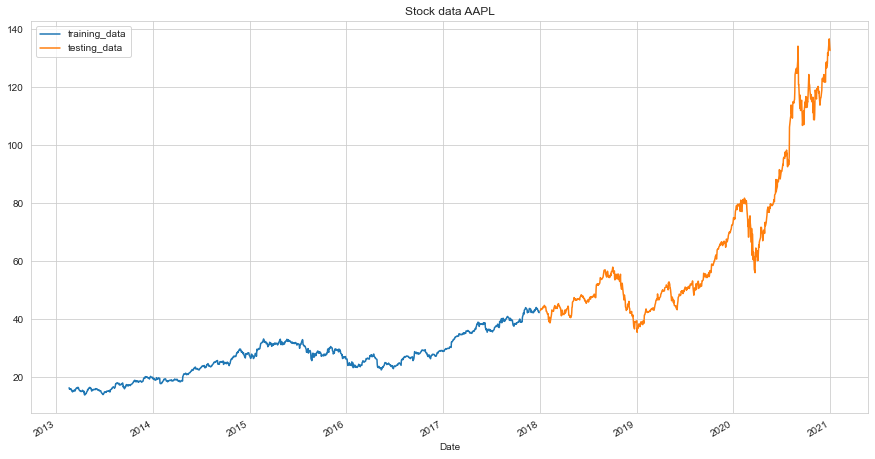

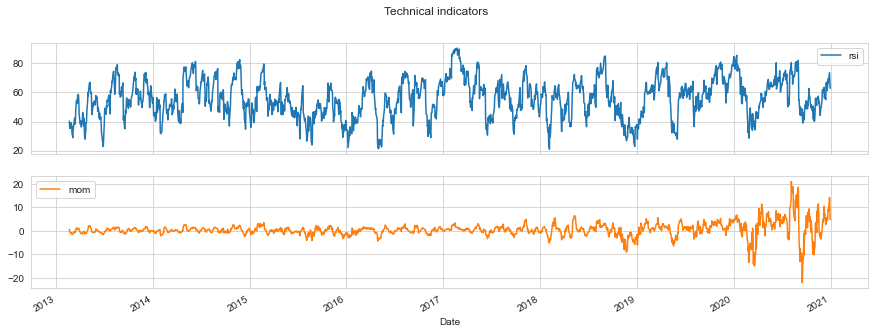

In [2]:
stock_name = 'aapl'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1541.38, duration: 0:00:00.218048
episode: 2/2000, episode end value: 1510.09, duration: 0:00:00.192044
episode: 3/2000, episode end value: 1499.29, duration: 0:00:00.217047
episode: 4/2000, episode end value: 1537.62, duration: 0:00:00.206061
episode: 5/2000, episode end value: 1564.97, duration: 0:00:00.187024
episode: 6/2000, episode end value: 1638.93, duration: 0:00:00.177041
episode: 7/2000, episode end value: 1516.47, duration: 0:00:00.176049
episode: 8/2000, episode end value: 1456.95, duration: 0:00:00.166028
episode: 9/2000, episode end value: 1577.71, duration: 0:00:00.197057
episode: 10/2000, episode end value: 1579.26, duration: 0:00:00.192031
episode: 11/2000, episode end value: 1528.46, duration: 0:00:00.198043
episode: 12/2000, episode end value: 1599.16, duration: 0:00:00.180060
episode: 13/2000, episode end value: 1638.21, duration: 0:00:00.173018
episode: 14/2000, episode end value: 1614.05, duration: 0:00:00.182039
episode: 15/200

episode: 117/2000, episode end value: 1497.49, duration: 0:00:00.489674
episode: 118/2000, episode end value: 1477.27, duration: 0:00:00.469756
episode: 119/2000, episode end value: 1484.83, duration: 0:00:00.527978
episode: 120/2000, episode end value: 1482.28, duration: 0:00:00.424697
episode: 121/2000, episode end value: 1495.49, duration: 0:00:00.445964
episode: 122/2000, episode end value: 1482.14, duration: 0:00:00.448933
episode: 123/2000, episode end value: 1498.52, duration: 0:00:00.540638
episode: 124/2000, episode end value: 1496.43, duration: 0:00:00.461367
episode: 125/2000, episode end value: 1500.71, duration: 0:00:00.463826
episode: 126/2000, episode end value: 1487.54, duration: 0:00:00.523598
episode: 127/2000, episode end value: 1488.16, duration: 0:00:00.464533
episode: 128/2000, episode end value: 1485.04, duration: 0:00:00.398078
episode: 129/2000, episode end value: 1478.12, duration: 0:00:00.489113
episode: 130/2000, episode end value: 1486.67, duration: 0:00:00

episode: 231/2000, episode end value: 1507.88, duration: 0:00:00.343705
episode: 232/2000, episode end value: 1504.77, duration: 0:00:00.363422
episode: 233/2000, episode end value: 1509.57, duration: 0:00:00.312270
episode: 234/2000, episode end value: 1522.25, duration: 0:00:00.371568
episode: 235/2000, episode end value: 1520.05, duration: 0:00:00.326784
episode: 236/2000, episode end value: 1514.14, duration: 0:00:00.348071
episode: 237/2000, episode end value: 1530.38, duration: 0:00:00.339784
episode: 238/2000, episode end value: 1612.19, duration: 0:00:00.357953
episode: 239/2000, episode end value: 1563.75, duration: 0:00:00.333021
episode: 240/2000, episode end value: 1510.21, duration: 0:00:00.327580
episode: 241/2000, episode end value: 1527.83, duration: 0:00:00.366924
episode: 242/2000, episode end value: 1544.74, duration: 0:00:00.318666
episode: 243/2000, episode end value: 1578.00, duration: 0:00:00.286155
episode: 244/2000, episode end value: 1514.51, duration: 0:00:00

episode: 345/2000, episode end value: 1514.65, duration: 0:00:00.354806
episode: 346/2000, episode end value: 1489.66, duration: 0:00:00.341582
episode: 347/2000, episode end value: 1523.34, duration: 0:00:00.385290
episode: 348/2000, episode end value: 1521.15, duration: 0:00:00.321194
episode: 349/2000, episode end value: 1513.24, duration: 0:00:00.329865
episode: 350/2000, episode end value: 1539.11, duration: 0:00:00.302721
episode: 351/2000, episode end value: 1535.11, duration: 0:00:00.348258
episode: 352/2000, episode end value: 1515.83, duration: 0:00:00.373358
episode: 353/2000, episode end value: 1536.20, duration: 0:00:00.247774
episode: 354/2000, episode end value: 1509.40, duration: 0:00:00.383789
episode: 355/2000, episode end value: 1502.77, duration: 0:00:00.406098
episode: 356/2000, episode end value: 1475.39, duration: 0:00:00.247490
episode: 357/2000, episode end value: 1577.09, duration: 0:00:00.272895
episode: 358/2000, episode end value: 1487.94, duration: 0:00:00

episode: 459/2000, episode end value: 1485.50, duration: 0:00:00.472345
episode: 460/2000, episode end value: 1487.62, duration: 0:00:00.428373
episode: 461/2000, episode end value: 1515.42, duration: 0:00:00.429175
episode: 462/2000, episode end value: 1528.64, duration: 0:00:00.493105
episode: 463/2000, episode end value: 1505.63, duration: 0:00:00.397059
episode: 464/2000, episode end value: 1497.13, duration: 0:00:00.485273
episode: 465/2000, episode end value: 1510.93, duration: 0:00:00.497052
episode: 466/2000, episode end value: 1513.13, duration: 0:00:00.378738
episode: 467/2000, episode end value: 1494.52, duration: 0:00:00.335998
episode: 468/2000, episode end value: 1518.34, duration: 0:00:00.388478
episode: 469/2000, episode end value: 1523.84, duration: 0:00:00.450604
episode: 470/2000, episode end value: 1499.15, duration: 0:00:00.372433
episode: 471/2000, episode end value: 1510.90, duration: 0:00:00.397287
episode: 472/2000, episode end value: 1525.49, duration: 0:00:00

episode: 573/2000, episode end value: 1500.18, duration: 0:00:00.295299
episode: 574/2000, episode end value: 1498.99, duration: 0:00:00.356167
episode: 575/2000, episode end value: 1476.23, duration: 0:00:00.406536
episode: 576/2000, episode end value: 1514.23, duration: 0:00:00.385306
episode: 577/2000, episode end value: 1479.81, duration: 0:00:00.330052
episode: 578/2000, episode end value: 1486.54, duration: 0:00:00.372526
episode: 579/2000, episode end value: 1524.20, duration: 0:00:00.437619
episode: 580/2000, episode end value: 1477.55, duration: 0:00:00.319238
episode: 581/2000, episode end value: 1482.27, duration: 0:00:00.365582
episode: 582/2000, episode end value: 1496.50, duration: 0:00:00.350627
episode: 583/2000, episode end value: 1511.52, duration: 0:00:00.381534
episode: 584/2000, episode end value: 1514.27, duration: 0:00:00.387736
episode: 585/2000, episode end value: 1483.24, duration: 0:00:00.321213
episode: 586/2000, episode end value: 1519.76, duration: 0:00:00

episode: 687/2000, episode end value: 1487.52, duration: 0:00:00.587133
episode: 688/2000, episode end value: 1484.17, duration: 0:00:00.547122
episode: 689/2000, episode end value: 1474.95, duration: 0:00:00.474105
episode: 690/2000, episode end value: 1489.93, duration: 0:00:00.450099
episode: 691/2000, episode end value: 1496.40, duration: 0:00:00.434097
episode: 692/2000, episode end value: 1484.35, duration: 0:00:00.495113
episode: 693/2000, episode end value: 1504.40, duration: 0:00:00.524117
episode: 694/2000, episode end value: 1510.89, duration: 0:00:00.425096
episode: 695/2000, episode end value: 1503.19, duration: 0:00:00.396088
episode: 696/2000, episode end value: 1510.50, duration: 0:00:00.350458
episode: 697/2000, episode end value: 1509.26, duration: 0:00:01.416807
episode: 698/2000, episode end value: 1480.10, duration: 0:00:00.333429
episode: 699/2000, episode end value: 1476.73, duration: 0:00:00.339581
episode: 700/2000, episode end value: 1504.11, duration: 0:00:00

episode: 801/2000, episode end value: 1556.15, duration: 0:00:00.304164
episode: 802/2000, episode end value: 1528.55, duration: 0:00:00.320505
episode: 803/2000, episode end value: 1520.11, duration: 0:00:00.304987
episode: 804/2000, episode end value: 1528.36, duration: 0:00:00.335296
episode: 805/2000, episode end value: 1489.80, duration: 0:00:00.334124
episode: 806/2000, episode end value: 1482.75, duration: 0:00:00.328244
episode: 807/2000, episode end value: 1466.46, duration: 0:00:00.307427
episode: 808/2000, episode end value: 1486.99, duration: 0:00:00.384547
episode: 809/2000, episode end value: 1519.09, duration: 0:00:00.327562
episode: 810/2000, episode end value: 1495.92, duration: 0:00:00.284642
episode: 811/2000, episode end value: 1534.25, duration: 0:00:00.327249
episode: 812/2000, episode end value: 1520.67, duration: 0:00:00.375782
episode: 813/2000, episode end value: 1530.95, duration: 0:00:00.421269
episode: 814/2000, episode end value: 1553.77, duration: 0:00:00

episode: 915/2000, episode end value: 1488.81, duration: 0:00:00.253558
episode: 916/2000, episode end value: 1492.71, duration: 0:00:00.243890
episode: 917/2000, episode end value: 1468.33, duration: 0:00:00.350986
episode: 918/2000, episode end value: 1489.98, duration: 0:00:00.394582
episode: 919/2000, episode end value: 1479.34, duration: 0:00:00.282083
episode: 920/2000, episode end value: 1481.56, duration: 0:00:00.372420
episode: 921/2000, episode end value: 1472.87, duration: 0:00:00.346553
episode: 922/2000, episode end value: 1491.41, duration: 0:00:00.355623
episode: 923/2000, episode end value: 1472.42, duration: 0:00:00.326569
episode: 924/2000, episode end value: 1478.01, duration: 0:00:00.357136
episode: 925/2000, episode end value: 1459.21, duration: 0:00:00.367634
episode: 926/2000, episode end value: 1522.78, duration: 0:00:00.393580
episode: 927/2000, episode end value: 1510.67, duration: 0:00:00.489455
episode: 928/2000, episode end value: 1490.53, duration: 0:00:00

episode: 1029/2000, episode end value: 1501.14, duration: 0:00:00.367786
episode: 1030/2000, episode end value: 1521.09, duration: 0:00:00.350191
episode: 1031/2000, episode end value: 1531.33, duration: 0:00:00.365397
episode: 1032/2000, episode end value: 1535.72, duration: 0:00:00.305205
episode: 1033/2000, episode end value: 1463.99, duration: 0:00:00.335207
episode: 1034/2000, episode end value: 1525.55, duration: 0:00:00.360885
episode: 1035/2000, episode end value: 1519.96, duration: 0:00:00.399720
episode: 1036/2000, episode end value: 1499.46, duration: 0:00:00.438516
episode: 1037/2000, episode end value: 1518.22, duration: 0:00:00.389186
episode: 1038/2000, episode end value: 1540.41, duration: 0:00:00.347026
episode: 1039/2000, episode end value: 1499.15, duration: 0:00:00.372597
episode: 1040/2000, episode end value: 1497.57, duration: 0:00:00.343814
episode: 1041/2000, episode end value: 1497.83, duration: 0:00:00.448157
episode: 1042/2000, episode end value: 1493.37, dur

episode: 1142/2000, episode end value: 1524.76, duration: 0:00:00.380272
episode: 1143/2000, episode end value: 1503.15, duration: 0:00:00.318723
episode: 1144/2000, episode end value: 1513.43, duration: 0:00:00.377013
episode: 1145/2000, episode end value: 1489.29, duration: 0:00:00.288336
episode: 1146/2000, episode end value: 1530.64, duration: 0:00:00.401320
episode: 1147/2000, episode end value: 1567.22, duration: 0:00:00.275116
episode: 1148/2000, episode end value: 1508.26, duration: 0:00:00.341508
episode: 1149/2000, episode end value: 1475.73, duration: 0:00:00.290647
episode: 1150/2000, episode end value: 1472.56, duration: 0:00:00.287367
episode: 1151/2000, episode end value: 1509.59, duration: 0:00:00.352356
episode: 1152/2000, episode end value: 1479.48, duration: 0:00:00.291240
episode: 1153/2000, episode end value: 1516.04, duration: 0:00:00.348069
episode: 1154/2000, episode end value: 1518.74, duration: 0:00:00.292138
episode: 1155/2000, episode end value: 1511.89, dur

episode: 1255/2000, episode end value: 1516.89, duration: 0:00:00.392423
episode: 1256/2000, episode end value: 1524.10, duration: 0:00:00.295939
episode: 1257/2000, episode end value: 1529.81, duration: 0:00:00.312180
episode: 1258/2000, episode end value: 1492.09, duration: 0:00:00.314092
episode: 1259/2000, episode end value: 1495.86, duration: 0:00:00.289503
episode: 1260/2000, episode end value: 1519.59, duration: 0:00:00.372901
episode: 1261/2000, episode end value: 1529.07, duration: 0:00:00.303484
episode: 1262/2000, episode end value: 1470.90, duration: 0:00:00.316131
episode: 1263/2000, episode end value: 1470.49, duration: 0:00:00.336045
episode: 1264/2000, episode end value: 1501.83, duration: 0:00:00.416468
episode: 1265/2000, episode end value: 1490.91, duration: 0:00:00.323084
episode: 1266/2000, episode end value: 1510.97, duration: 0:00:00.333626
episode: 1267/2000, episode end value: 1503.83, duration: 0:00:00.337976
episode: 1268/2000, episode end value: 1490.36, dur

episode: 1368/2000, episode end value: 1483.67, duration: 0:00:00.452554
episode: 1369/2000, episode end value: 1487.30, duration: 0:00:00.461651
episode: 1370/2000, episode end value: 1483.15, duration: 0:00:00.376053
episode: 1371/2000, episode end value: 1481.84, duration: 0:00:00.427012
episode: 1372/2000, episode end value: 1480.56, duration: 0:00:00.399705
episode: 1373/2000, episode end value: 1483.53, duration: 0:00:00.428628
episode: 1374/2000, episode end value: 1486.36, duration: 0:00:00.475255
episode: 1375/2000, episode end value: 1484.14, duration: 0:00:00.413817
episode: 1376/2000, episode end value: 1486.56, duration: 0:00:00.375119
episode: 1377/2000, episode end value: 1489.66, duration: 0:00:00.432622
episode: 1378/2000, episode end value: 1487.42, duration: 0:00:00.398604
episode: 1379/2000, episode end value: 1488.75, duration: 0:00:00.438730
episode: 1380/2000, episode end value: 1487.92, duration: 0:00:00.406474
episode: 1381/2000, episode end value: 1483.58, dur

episode: 1481/2000, episode end value: 1478.76, duration: 0:00:00.419609
episode: 1482/2000, episode end value: 1491.88, duration: 0:00:00.425232
episode: 1483/2000, episode end value: 1487.13, duration: 0:00:00.443715
episode: 1484/2000, episode end value: 1510.90, duration: 0:00:00.517297
episode: 1485/2000, episode end value: 1506.81, duration: 0:00:00.461546
episode: 1486/2000, episode end value: 1524.24, duration: 0:00:00.466079
episode: 1487/2000, episode end value: 1512.88, duration: 0:00:00.467090
episode: 1488/2000, episode end value: 1527.60, duration: 0:00:00.486290
episode: 1489/2000, episode end value: 1549.93, duration: 0:00:00.484695
episode: 1490/2000, episode end value: 1519.03, duration: 0:00:00.450921
episode: 1491/2000, episode end value: 1461.58, duration: 0:00:00.313076
episode: 1492/2000, episode end value: 1495.95, duration: 0:00:00.336197
episode: 1493/2000, episode end value: 1486.99, duration: 0:00:00.382956
episode: 1494/2000, episode end value: 1482.31, dur

episode: 1594/2000, episode end value: 1479.97, duration: 0:00:00.341406
episode: 1595/2000, episode end value: 1467.66, duration: 0:00:00.332594
episode: 1596/2000, episode end value: 1450.16, duration: 0:00:00.317579
episode: 1597/2000, episode end value: 1457.10, duration: 0:00:00.378703
episode: 1598/2000, episode end value: 1464.65, duration: 0:00:00.349363
episode: 1599/2000, episode end value: 1500.17, duration: 0:00:00.352260
episode: 1600/2000, episode end value: 1501.22, duration: 0:00:00.337071
episode: 1601/2000, episode end value: 1502.70, duration: 0:00:00.283604
episode: 1602/2000, episode end value: 1510.71, duration: 0:00:00.362492
episode: 1603/2000, episode end value: 1497.13, duration: 0:00:00.302357
episode: 1604/2000, episode end value: 1500.23, duration: 0:00:00.400395
episode: 1605/2000, episode end value: 1515.76, duration: 0:00:00.357006
episode: 1606/2000, episode end value: 1512.48, duration: 0:00:00.341366
episode: 1607/2000, episode end value: 1506.84, dur

episode: 1707/2000, episode end value: 1462.07, duration: 0:00:00.349368
episode: 1708/2000, episode end value: 1454.56, duration: 0:00:00.341206
episode: 1709/2000, episode end value: 1461.77, duration: 0:00:00.372993
episode: 1710/2000, episode end value: 1465.32, duration: 0:00:00.307840
episode: 1711/2000, episode end value: 1475.50, duration: 0:00:00.357338
episode: 1712/2000, episode end value: 1457.25, duration: 0:00:00.383696
episode: 1713/2000, episode end value: 1468.10, duration: 0:00:00.419805
episode: 1714/2000, episode end value: 1458.91, duration: 0:00:00.334391
episode: 1715/2000, episode end value: 1523.47, duration: 0:00:00.451128
episode: 1716/2000, episode end value: 1477.57, duration: 0:00:00.453994
episode: 1717/2000, episode end value: 1475.60, duration: 0:00:00.276900
episode: 1718/2000, episode end value: 1498.93, duration: 0:00:00.406516
episode: 1719/2000, episode end value: 1473.90, duration: 0:00:00.320204
episode: 1720/2000, episode end value: 1476.35, dur

episode: 1820/2000, episode end value: 1461.19, duration: 0:00:00.291278
episode: 1821/2000, episode end value: 1468.99, duration: 0:00:00.318121
episode: 1822/2000, episode end value: 1497.90, duration: 0:00:00.390482
episode: 1823/2000, episode end value: 1447.82, duration: 0:00:00.268604
episode: 1824/2000, episode end value: 1515.60, duration: 0:00:00.423065
episode: 1825/2000, episode end value: 1527.61, duration: 0:00:00.392382
episode: 1826/2000, episode end value: 1490.40, duration: 0:00:00.336248
episode: 1827/2000, episode end value: 1509.63, duration: 0:00:00.379340
episode: 1828/2000, episode end value: 1524.81, duration: 0:00:00.330209
episode: 1829/2000, episode end value: 1494.76, duration: 0:00:00.336043
episode: 1830/2000, episode end value: 1482.94, duration: 0:00:00.349394
episode: 1831/2000, episode end value: 1498.08, duration: 0:00:00.434113
episode: 1832/2000, episode end value: 1511.39, duration: 0:00:00.415252
episode: 1833/2000, episode end value: 1548.55, dur

episode: 1933/2000, episode end value: 1487.52, duration: 0:00:00.480555
episode: 1934/2000, episode end value: 1525.89, duration: 0:00:00.439396
episode: 1935/2000, episode end value: 1487.27, duration: 0:00:00.457071
episode: 1936/2000, episode end value: 1484.51, duration: 0:00:00.337126
episode: 1937/2000, episode end value: 1504.32, duration: 0:00:00.405346
episode: 1938/2000, episode end value: 1544.57, duration: 0:00:00.438974
episode: 1939/2000, episode end value: 1547.17, duration: 0:00:00.471218
episode: 1940/2000, episode end value: 1535.12, duration: 0:00:00.435765
episode: 1941/2000, episode end value: 1469.59, duration: 0:00:00.331578
episode: 1942/2000, episode end value: 1482.84, duration: 0:00:00.342852
episode: 1943/2000, episode end value: 1489.10, duration: 0:00:00.374721
episode: 1944/2000, episode end value: 1466.16, duration: 0:00:00.340706
episode: 1945/2000, episode end value: 1472.24, duration: 0:00:00.365033
episode: 1946/2000, episode end value: 1480.57, dur

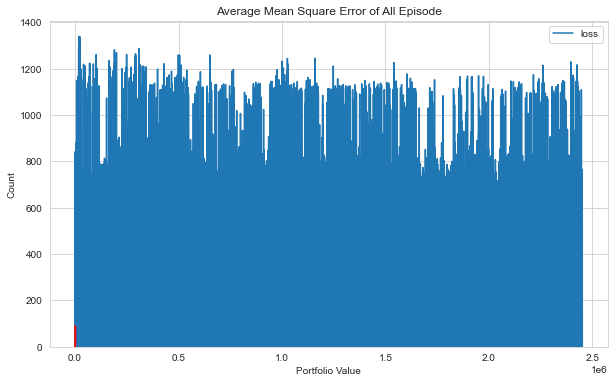

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

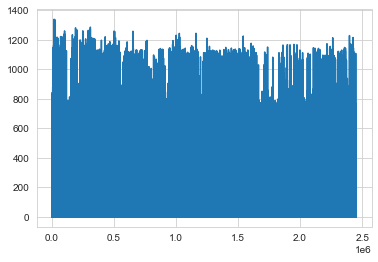

In [5]:
plt.plot(agent.model.losses)

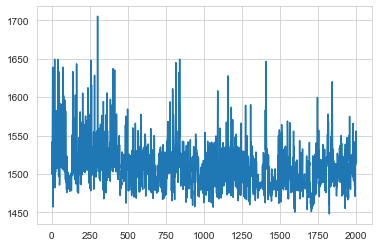

In [6]:
plt.plot(portfolio_value)

episode end value: 1578.32, duration: 0:00:00.150724
Sell: 411 times, Buy: 343 times


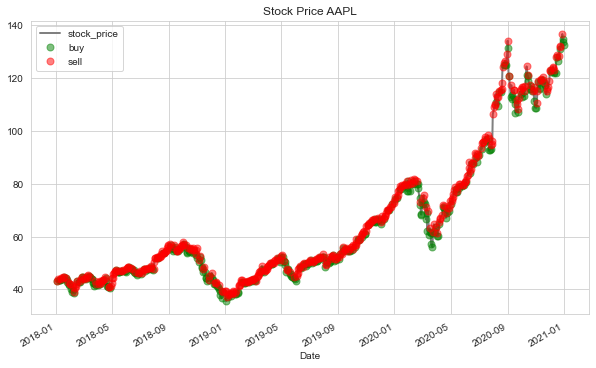

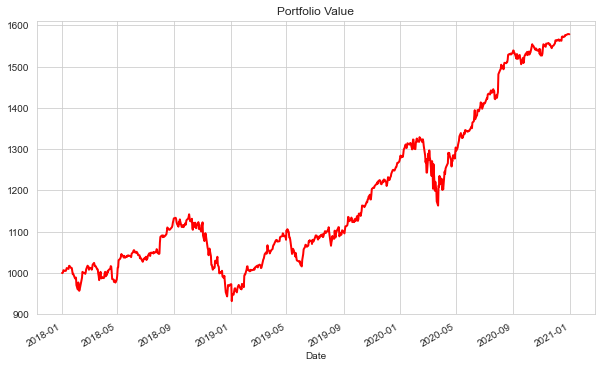

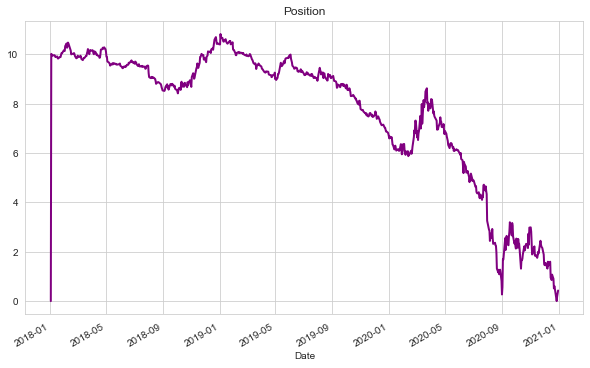

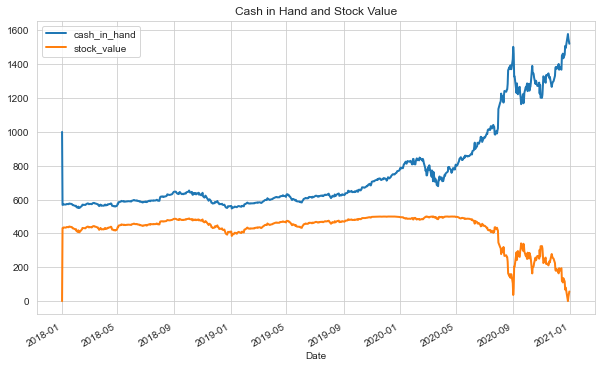

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: AAPL
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 16.43 %
Volatility: 0.1319
shape ratio: 1.1627
Maximun drawdown: -18.41 %
Calmar ratio: 0.8925
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 45.51 %
Volatility (benchmark): 0.3512
shape ratio: 1.2647
Maximun drawdown: -38.73 %
Calmar ratio (benchmark): 1.1752


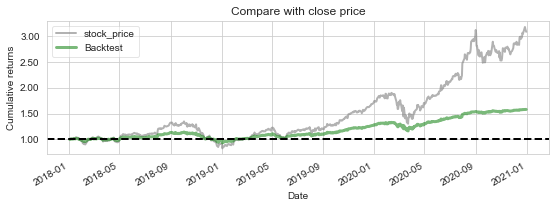

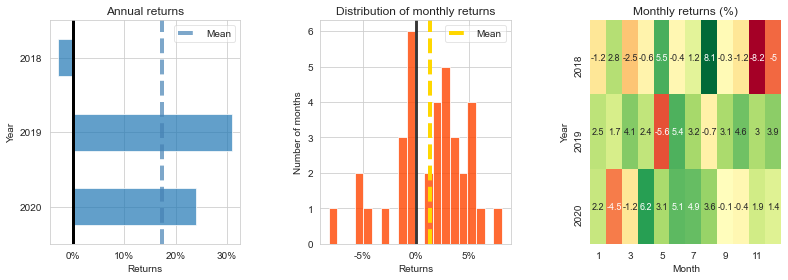

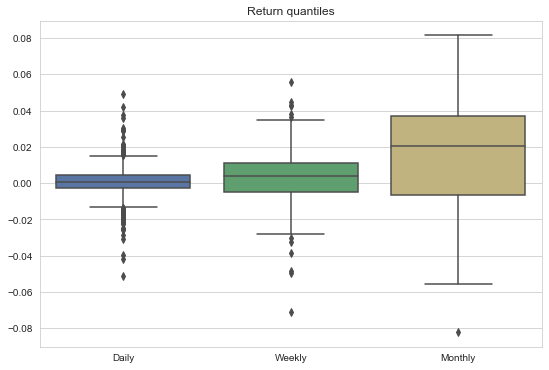

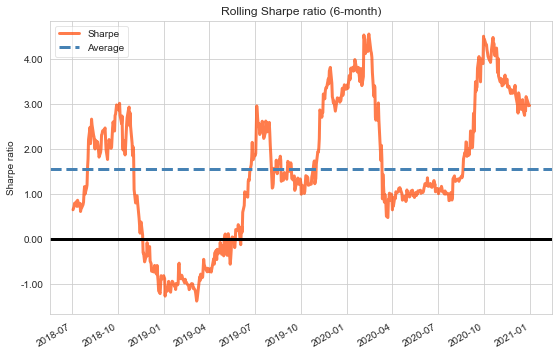

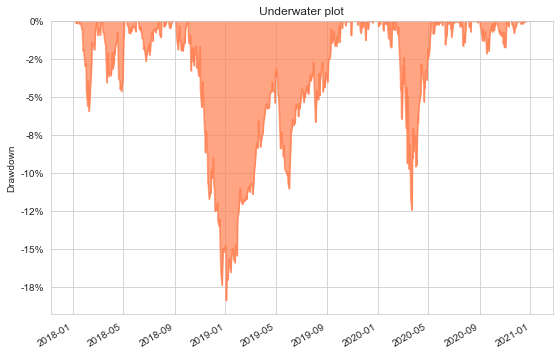

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')